### parte 1 ###

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('spotify-2023 (2).csv', encoding='latin1')

In [ ]:
df.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
cols_to_drop = [
    'artist_count', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts',
    'in_apple_playlists', 'in_apple_charts',
    'in_deezer_playlists', 'in_deezer_charts',
    'in_shazam_charts', 'key', 'mode',
    'danceability_%', 'valence_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

# Filtra apenas as colunas que estão no DataFrame
cols_to_drop = [col for col in cols_to_drop if col in df.columns]
df.drop(columns=cols_to_drop, inplace=True)


In [ ]:
print(df.columns)

Index(['track_name', 'artist(s)_name', 'released_year', 'streams', 'bpm',
       'energy_%'],
      dtype='object')


In [ ]:
df.head(10)

,track_name,artist(s)_name,released_year,streams,bpm,energy_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,141381703,125,83
1,LALA,Myke Towers,2023,133716286,92,74
2,vampire,Olivia Rodrigo,2023,140003974,138,53
3,Cruel Summer,Taylor Swift,2019,800840817,170,72
4,WHERE SHE GOES,Bad Bunny,2023,303236322,144,80
5,Sprinter,"Dave, Central Cee",2023,183706234,141,58
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2023,725980112,148,76
7,Columbia,Quevedo,2023,58149378,100,71
8,fukumean,Gunna,2023,95217315,130,62
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2023,553634067,170,48


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   track_name      953 non-null    object
 1   artist(s)_name  953 non-null    object
 2   released_year   953 non-null    int64 
 3   streams         953 non-null    object
 4   bpm             953 non-null    int64 
 5   energy_%        953 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 44.8+ KB


In [ ]:
df.drop

<bound method DataFrame.drop of                               track_name      artist(s)_name  released_year  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook           2023   
1                                   LALA         Myke Towers           2023   
2                                vampire      Olivia Rodrigo           2023   
3                           Cruel Summer        Taylor Swift           2019   
4                         WHERE SHE GOES           Bad Bunny           2023   
..                                   ...                 ...            ...   
948                         My Mind & Me        Selena Gomez           2022   
949            Bigger Than The Whole Sky        Taylor Swift           2022   
950                 A Veces (feat. Feid)  Feid, Paulo Londra           2022   
951                        En La De Ella  Feid, Sech, Jhayco           2022   
952                                Alone           Burna Boy           2022   

       streams  bpm  energy_%  
0    141381703  125        83  
1    133716286   92        74  
2    140003974  138        53  
3    800840817  170        72  
4    303236322  144        80  
..         ...  ...       ...  
948   91473363  144        39  
949  121871870  166        24  
950   73513683   92        67  
951  133895612   97        77  
952   96007391   90        67  

[953 rows x 6 columns]>

In [ ]:
df_numeric = df[['streams', 'bpm', 'energy_%']]

In [ ]:
print(df.dtypes)

track_name        object
artist(s)_name    object
released_year      int64
streams           object
bpm                int64
energy_%           int64
dtype: object


In [ ]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce')
df['energy_%'] = pd.to_numeric(df['energy_%'], errors='coerce')


print(df[['streams', 'bpm', 'energy_%']].isnull().sum())

streams     1
bpm         0
energy_%    0
dtype: int64


In [ ]:
df_numeric = df[['streams', 'bpm', 'energy_%']].dropna()


In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df_scaled)


KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
print(len(df))
print(len(df_numeric))
print(len(df_scaled))

953
952
952


In [ ]:
df_numeric_clean = df_numeric.dropna()


In [ ]:
df_scaled = scaler.fit_transform(df_numeric_clean)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
df_clean = df.loc[df_numeric_clean.index]
df_clean['Cluster'] = kmeans.labels_

In [ ]:
print(f"Row numbers in the original dataframe: {len(df)}")
print(f"Row numbers in the numeric dataframe: {len(df_numeric)}")
print(f"Row numbers in the scaled dataframe: {len(df_scaled)}")

Row numbers in the original dataframe: 953
Row numbers in the numeric dataframe: 952
Row numbers in the scaled dataframe: 952


In [ ]:
df_numeric_clean = df_numeric.dropna()
df_scaled = scaler.fit_transform(df_numeric_clean)
kmeans.fit(df_scaled)
print(f"Generated label numbers: {len(kmeans.labels_)}")

Generated label numbers: 952


In [ ]:
df_clean = df.loc[df_numeric_clean.index]
df_clean['Cluster'] = kmeans.labels_
print(df_clean.head())

                            track_name    artist(s)_name  released_year  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook           2023   
1                                 LALA       Myke Towers           2023   
2                              vampire    Olivia Rodrigo           2023   
3                         Cruel Summer      Taylor Swift           2019   
4                       WHERE SHE GOES         Bad Bunny           2023   

       streams  bpm  energy_%  Cluster  
0  141381703.0  125        83        1  
1  133716286.0   92        74        1  
2  140003974.0  138        53        2  
3  800840817.0  170        72        2  
4  303236322.0  144        80        2  


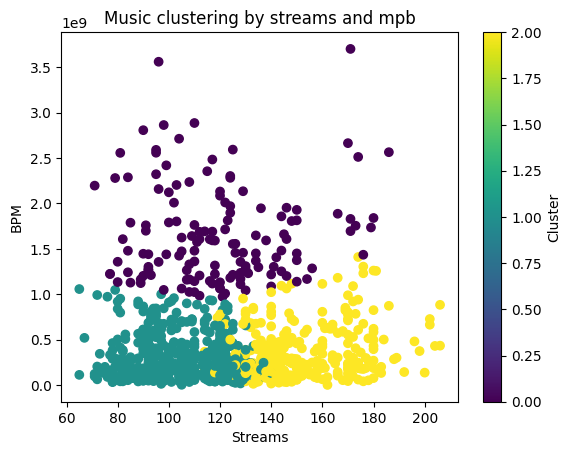

In [ ]:
import matplotlib.pyplot as plt

# Plotar os clusters em um gráfico de dispersão
plt.scatter(df_clean['bpm'], df_clean['streams'], c=df_clean['Cluster'], cmap='viridis')
plt.xlabel('Streams')
plt.ylabel('BPM')
plt.title('Music clustering by streams and mpb')
plt.colorbar(label='Cluster')
plt.show()

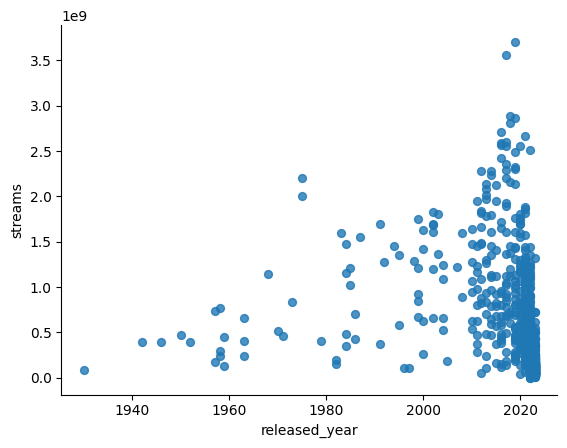

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='released_year', y='streams', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# top 5 mais ouvidas (parte 2 ) #

In [ ]:
df.head(5)

,track_name,artist(s)_name,released_year,streams,bpm,energy_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,141381703.0,125,83
1,LALA,Myke Towers,2023,133716286.0,92,74
2,vampire,Olivia Rodrigo,2023,140003974.0,138,53
3,Cruel Summer,Taylor Swift,2019,800840817.0,170,72
4,WHERE SHE GOES,Bad Bunny,2023,303236322.0,144,80


In [ ]:
top_5 = df.sort_values(by='streams', ascending=False).head(5)


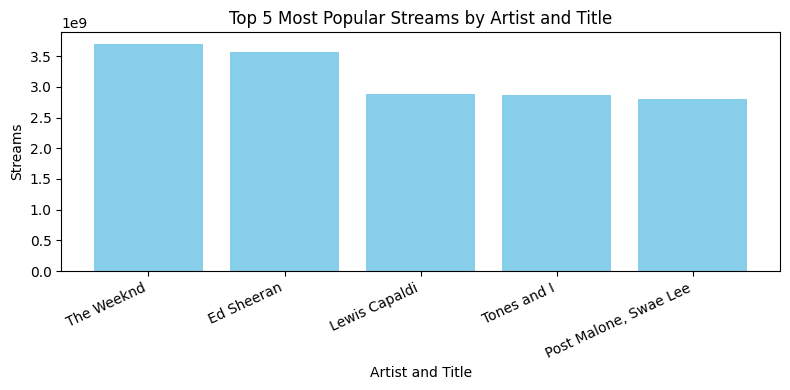

In [ ]:
import matplotlib.pyplot as plt


top_5 = df.nlargest(5, 'streams')

# Criando o gráfico
plt.figure(figsize=(8, 4))
plt.bar(top_5['artist(s)_name'], top_5['streams'], color='skyblue')  # Ajuste 'artist_title' para o nome correto da coluna
plt.xlabel('Artist and Title')
plt.ylabel('Streams')
plt.title('Top 5 Most Popular Streams by Artist and Title')
plt.xticks(rotation=25, ha='right')  # Ajusta os rótulos do eixo X para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()
